In [89]:
import gzip
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB


### Loading data into pandas dataframe

In [3]:


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')




In [4]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]
print(count_row)
print(count_col)

278677
9


In [6]:
products = df['asin'].value_counts()
print(products.count())
print(products.head(10))#top 10 reviewed products

23033
B005LERHD8    441
B005GYGD7O    286
B008WYDP1C    249
B0058XIMMM    241
B00CKGB85I    225
B007RD9DS8    217
B002RADHJC    211
B000T9VK56    207
B0000C321X    205
B007WNWEFC    197
Name: asin, dtype: int64


In [7]:
print(products.tail(10))# 10 products with least reviews 

B007Y7274O    5
B0049MTFP6    5
B001LJEB3G    5
B00E9AHQN6    5
B003EZSEU6    5
B002NSMEP6    5
B003JP1FT8    5
B000ROHQWY    5
B003IG6Q9M    5
B00D2LT168    5
Name: asin, dtype: int64


In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0)



reviewerID          0
asin                0
reviewerName      452
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [36]:
reviews = df['reviewText']




In [37]:
reviews.count()

278677

In [8]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/lakshmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

from nltk.tokenize import word_tokenize
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer

import string
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return tokens

def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

In [40]:
reviews = reviews.apply(lambda x: tokenize(x))


### Adding a new column 'Sentiment' . It will have a value of 1 if the overall rating is greater than 3 and a value 0 if the overall rating is below 3

In [9]:
df['Sentiment'] = [1  if x > 3 else 0 for x in df.overall]


In [10]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011",1
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013",1
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013",1
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014",1
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014",1


### Checking if there is a class imbalance... 

In [13]:
df['overall'].value_counts()

5.0    163240
4.0     58357
3.0     30425
2.0     15463
1.0     11192
Name: overall, dtype: int64

In [11]:
 df['Sentiment'].value_counts()



1    221597
0     57080
Name: Sentiment, dtype: int64

In [16]:

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.Sentiment, random_state=0)


In [10]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (209007,)
y_train (209007,)
x_test (69670,)
y_test (69670,)


### Preprocessing on Dataset using Sklearn's CountVectorizer and TFIDF.

### CountVectorizer

In [17]:
vectorizer = CountVectorizer(min_df=3,stop_words="english").fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))



X_train:
<209007x25420 sparse matrix of type '<class 'numpy.int64'>'
	with 4727503 stored elements in Compressed Sparse Row format>


### Removing the stop words of english,and 
min_df =3 : ignore terms that have a document frequency strictly lower than the given threshold.
Aftet that the vocabulary built from the text id 25420

In [18]:
feature_names = vectorizer.get_feature_names()


### Similarily building vocabulary with TFIDF

### TFIDF 

In [92]:
tfidfvectorizer = TfidfVectorizer(min_df=3,stop_words="english")
tfidf_train = tfidfvectorizer.fit_transform(x_train) 
feature_names = tfidfvectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))


Number of features: 25420


### Logistic Regression count vectorizer

In [19]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

log_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(log_test)



In [20]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))



Accuracy:   0.873


In [44]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, log_y_pred, target_names=target_names))



             precision    recall  f1-score   support

    class 0       0.76      0.54      0.63     14054
    class 1       0.89      0.96      0.92     55616

avg / total       0.86      0.87      0.86     69670



In [46]:
fpr, tpr, thresholds = roc_curve(y_test, pred_labels, pos_label=1)
print("Logistic Regression AUC: {0}".format(auc(fpr, tpr)))



Logistic Regression AUC: 0.7364468404725453


### Logistic Regression TFIDF

In [40]:
logreg_tfidf = LogisticRegression(C=0.1).fit(tfidf_train, y_train)

log_tfidf_test = tfidfvectorizer.transform(x_test)

pred_log_tfidf = logreg.predict(log_tfidf_test)



In [41]:
from sklearn.metrics import accuracy_score
logreg_tfdif_score = accuracy_score(y_test, pred_log_tfidf)
print("Accuracy:   {:.3f}".format(logreg_tfdif_score))



Accuracy:   0.822


### Multinomial Naive Bayes using count vectorizer

In [47]:
nb = MultinomialNB().fit(X_train, y_train)
nb_test = vectorizer.transform(x_test)
nb_y_pred = nb.predict(nb_test)
nb_score = accuracy_score(y_test, nb_y_pred)
print("Accuracy:   {:.3f}".format(nb_score))




Accuracy:   0.853


### Multinomial Naive Bayes using TFIDF

In [44]:

nb_tfidf = MultinomialNB().fit(tfidf_train, y_train)
nb_tfidf_test = tfidfvectorizer.transform(x_test)
pred_nb_tfidf = nb_tfidf.predict(nb_tfidf_test)
nb_tfidf_score = accuracy_score(y_test, pred_nb_tfidf)
print("Accuracy:   {:.3f}".format(nb_tfidf_score))





Accuracy:   0.830


### Random Forest Classifier countvectorizer


In [90]:
forest_classifier = RandomForestClassifier().fit(X_train, y_train)
forest_test = vectorizer.transform(x_test)
forest_y_pred = forest_classifier.predict(forest_test)
forest_score = accuracy_score(y_test, forest_y_pred)
print("Accuracy:   {:.3f}".format(forest_score))
print(classification_report(y_test, forest_y_pred))
fpr, tpr, thresholds = roc_curve(y_test, forest_y_pred, pos_label=1)
print("Random Forest Count Vectorizer  AUC: {0}".format(auc(fpr, tpr)))







Accuracy:   0.838
             precision    recall  f1-score   support

          0       0.65      0.43      0.52     14054
          1       0.87      0.94      0.90     55616

avg / total       0.82      0.84      0.82     69670

Random Forest Count Vectorizer  AUC: 0.6843820726806172


### Random Forest Classifier TFIDF

In [93]:
forest_tfidf = RandomForestClassifier().fit(tfidf_train, y_train)
forest_tfidf_test = tfidfvectorizer.transform(x_test)
pred_forest_tfidf = forest_tfidf.predict(forest_tfidf_test)
forest_tfidf_score = accuracy_score(y_test, pred_forest_tfidf)
print("Accuracy:   {:.3f}".format(forest_tfidf_score))





Accuracy:   0.842


In [95]:
print(classification_report(y_test, pred_forest_tfidf))
fpr, tpr, thresholds = roc_curve(y_test, pred_forest_tfidf, pos_label=1)
print("Random Forest TFDIF   AUC: {0}".format(auc(fpr, tpr)))




             precision    recall  f1-score   support

          0       0.69      0.40      0.50     14054
          1       0.86      0.95      0.91     55616

avg / total       0.83      0.84      0.83     69670

Random Forest TFDIF   AUC: 0.6765379207652613


### Since number of features is really high, reducing them using Truncated SVD one of the dimension
reduction techniques.

### Dimension Reduction

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1200,random_state=42)
svd = svd.fit(X_train)
data = svd.fit_transform(X_train)








### The below curve quantifies the variance of total features, 25420 
This curve quantifies how much of the total, 25420 dimensional variance is contained within the first N components.
The  first 250  components contain approximately 60% 
of the variance, while 1200 components to explain 80% of the variance

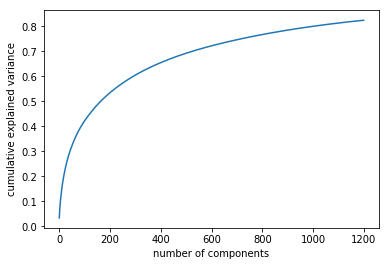

In [22]:

plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Running Logistic and Random Forest Classifier after Dimension reduction Techniques

### Logistic Regression CountVectorizer

In [64]:

classifier = LogisticRegression()

# transform / fit

classifier.fit(data, y_train)



# transform new data using already fitted 
new_transformed = svd.transform(log_test)

# predict labels using the trained classifier

pred_labels = classifier.predict(new_transformed)





In [65]:
log_score_reduced = accuracy_score(y_test, pred_labels)
print("Accuracy:   {:.3f}".format(log_score_reduced))




Accuracy:   0.867


In [66]:
 
cm = confusion_matrix(y_test, pred_labels)
print(cm)

[[ 7274  6780]
 [ 2485 53131]]


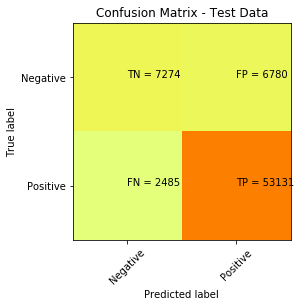

In [67]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [68]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_labels, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.75      0.52      0.61     14054
    class 1       0.89      0.96      0.92     55616

avg / total       0.86      0.87      0.86     69670



In [69]:
fpr, tpr, thresholds = roc_curve(y_test, pred_labels, pos_label=1)
print("Logistic Regression AUC: {0}".format(auc(fpr, tpr)))



Logistic Regression AUC: 0.7364468404725453


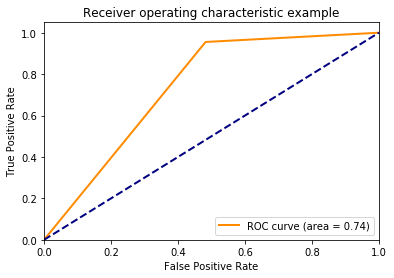

In [70]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### As we noticed few cells above , there was a class imbalance , so trying with lower threshold 

In [75]:
THRESHOLD = 0.25
preds = np.where(classifier.predict_proba(new_transformed)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.843936
recall,0.985939
precision,0.844575
roc_auc_score,0.633962


In [76]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(data, y_train)



# transform new data using already fitted 
new_transformed = svd.transform(log_test)

# predict labels using the trained classifier

pred_labels = classifier.predict(new_transformed)






In [78]:
print(classification_report(y_test, pred_labels))


             precision    recall  f1-score   support

          0       0.75      0.52      0.61     14054
          1       0.89      0.96      0.92     55616

avg / total       0.86      0.87      0.86     69670



In [82]:
fpr, tpr, thresholds = roc_curve(y_test, pred_labels, pos_label=1)
print("Logistic Regression AUC: {0}".format(auc(fpr, tpr)))
cm = confusion_matrix(y_test, pred_labels)
print(cm)


Logistic Regression AUC: 0.7364468404725453
[[ 7274  6780]
 [ 2485 53131]]


In [57]:
from sklearn.decomposition import TruncatedSVD
svd_nb = TruncatedSVD(n_components=1200,random_state=42)
svd_nb = svd_nb.fit(X_train)
data_nb = svd_nb.fit_transform(X_train)




### Random Forest Classifier Count Vectorizer

In [59]:
 from sklearn.ensemble import RandomForestClassifier
nb_reduced = RandomForestClassifier()

# transform / fit

nb_reduced.fit(data_nb, y_train)



# transform new data using already fitted 
new_transformed_nb = svd_nb.transform(log_test)

# predict labels using the trained classifier

pred_labels = nb_reduced.predict(new_transformed_nb)





In [60]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_labels, target_names=target_names))



             precision    recall  f1-score   support

    class 0       0.43      0.26      0.32     14054
    class 1       0.83      0.91      0.87     55616

avg / total       0.75      0.78      0.76     69670



In [62]:
fpr, tpr, thresholds = roc_curve(y_test, pred_labels, pos_label=1)
print("Random Forest Classifier Regression AUC: {0}".format(auc(fpr, tpr)))




Random Forest Classifier Regression AUC: 0.5869807645297286


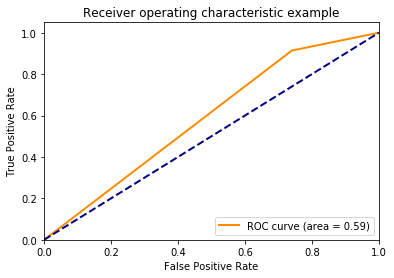

In [63]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Choosing Logistic Regression over Random Forest Classifer as F1 score was better.